# K-Means; Some background
Consider the set
 $D = \{ {\bf x}_{1}, {\bf x}_{2}, \cdots, {\bf x}_{N}) \} $, where each ${\bf x}_i \in \mathbb{R}^d$ is a $d$ dimensional feature vector. The goal is to find $K$ clusters that with cluster centers $ \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{K}\} $ that can represent this data set so that the following loss function is minimized
$$
J=\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2
$$

The cluster centers are then found using the following
 $$
 \begin{align}
 \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{K}\}& = \underset{\{ {\bf x}^c_{1}, {\bf x}^c_{2}, \cdots, {\bf x}^c_{K}\}}{argmin} ~~  \frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2 \\
 \end{align}
 $$   

 Unfortunately this loss function is not convex so depending your initial condition and your optimization strategy, the minimum you find might be a local minima. Knowing this fact, in most cases, you solve this optimization problem as follows:


1.   Randomly initialize cluster centers  $ \{ {\bf x}^{c}_{1}, {\bf x}^{c}_{2}, \cdots, {\bf x}^{c}_{K}\} $ (typically, you set them to any $K$ distinct feature vectors from $D$)
2.  Find members of cluster sets (for each ${\bf x}_{i}$ select membership to the cluster of the closest ${\bf x}^{*c}_{j}$)
$$
S_{j^*} = \{ {\bf x}_i \in D ~|~ j^* = \underset{j}{argmin} \| {\bf x}_i - {\bf x}_j^c\| \} ~~~ j^*=1, \cdots, K
$$
1.   Find the new cluster centers (just calculate the average of all members of each cluster):
$$
{\bf x}^c_{j^*} \leftarrow  \frac{1} {|S_{j*}|}\sum_{\forall {x}_i\in S_{j*} }{\bf x}_i ~~~~~~~~ j^*= 1, \cdots, K
$$
where $|S_{j*}|$ is the cardinality of $S_{j*}$ ( the number of elements of $S_{j*}$).
2.   Calculate the cost function, now with the new cluster memberships:
$$
J_{new}=\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_{j^*}^c\|^2
$$
If the cluster membership does not change from teh last iteration, then stop.  Otherwise go to step 2.



***
***

#Problem 1 [2 points]
Write Python code that implements the K-Means algorithm, as given above, to classify the data.
*   Use $K=5$
*   To reduce the sensitivity to initial conditions, your code should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the final cost, $J$


#Problem 2 [3 points]
Repeat what you did in Problem 1, except this time, vary the number of clusters.
*   Use $K=2$, $K=4$, and $K=10$.   
*   To reduce the sensitivity to initial conditions, your code for each case should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the minimum cost, $J_K$, for $K=2, 4, 10$

  Use the data that is generated in the following code to test your code.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2],
     [-1.5 ,  2],
     [-3,  1.8],
     [-3,  3],
     [-3,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=17)

Text(0, 0.5, '$x_2$')

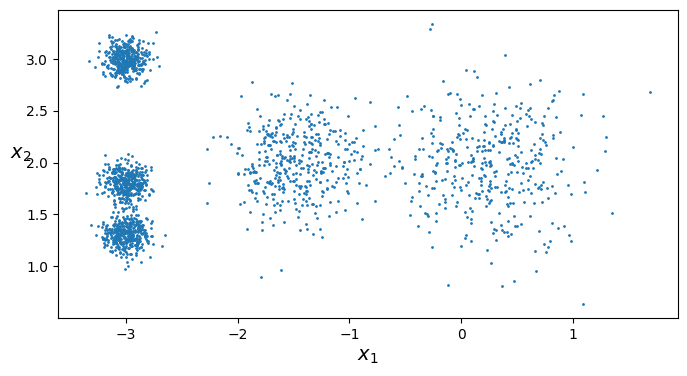

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
